In [1]:
import pandas as pd
import numpy as np

In [2]:
event_def = pd.read_csv('Event_Definitions.csv')

In [3]:
event_def 

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [4]:
smaller_sample = pd.read_csv('smaller_sample.csv')

In [5]:
len(smaller_sample)

3246341

In [6]:
smaller_sample = smaller_sample.sort_values(by=['customer_id', 'event_timestamp'])

In [7]:
unique_stages = smaller_sample['ed_id'].unique()

In [8]:
smaller_sample['next_ed'] = smaller_sample.groupby('customer_id')['ed_id'].shift(-1)

In [9]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0


In [10]:
smaller_sample = smaller_sample.dropna(subset=['next_ed'])

In [11]:
ed_id_transition_counts = smaller_sample.groupby(['ed_id', 'next_ed']).size().unstack(fill_value=0)

In [12]:
ed_id_transition_matrix = ed_id_transition_counts.div(ed_id_transition_counts.sum(axis=1), axis=0)

In [13]:
print(ed_id_transition_matrix)

next_ed      1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
ed_id                                                                           
1        0.479956  0.010161  0.001581  0.111800  0.048445  0.010594  0.000324   
2        0.056165  0.011305  0.009375  0.131864  0.031179  0.015123  0.000255   
3        0.011698  0.010495  0.167707  0.024240  0.008863  0.004997  0.000458   
4        0.034423  0.004189  0.001015  0.704515  0.052794  0.003851  0.000297   
5        0.042986  0.002639  0.001416  0.297174  0.292472  0.295937  0.001218   
6        0.107344  0.005452  0.003297  0.087880  0.453096  0.140883  0.060395   
7        0.017303  0.011132  0.002826  0.122505  0.070539  0.026531  0.005018   
8        0.016255  0.008675  0.001278  0.122871  0.054883  0.017214  0.331446   
10       0.000000  0.000000  0.000000  0.000000  0.071429  0.071429  0.000000   
11       0.034823  0.002021  0.001806  0.421463  0.408864  0.022525  0.001303   
12       0.189088  0.058089 

In [14]:
smaller_sample['next_event'] = smaller_sample.groupby('customer_id')['event_name'].shift(-1)

In [15]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed,next_event
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0,browse_products
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0,campaignemail_clicked
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0,promotion_created
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0,promotion_created
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0,catalog_(mail)


In [16]:
smaller_sample = smaller_sample.dropna(subset=['next_event'])

In [17]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed,next_event
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0,browse_products
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0,campaignemail_clicked
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0,promotion_created
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0,promotion_created
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0,catalog_(mail)


In [18]:
event_transition_counts = smaller_sample.groupby(['event_name', 'next_event']).size().unstack(fill_value=0)

In [19]:
event_transition_matrix = event_transition_counts.div(event_transition_counts.sum(axis=1), axis=0)

In [20]:
print(event_transition_matrix)

next_event                              account_activitation  \
event_name                                                     
account_activitation                                0.000491   
account_downpaymentcleared                          0.000327   
account_downpaymentreceived                         0.000000   
add_to_cart                                         0.001356   
application_phone_approved                          0.059448   
application_phone_declined                          0.090909   
application_web_approved                            0.006660   
application_web_declined                            0.007360   
application_web_pending                             0.000000   
application_web_submit                              0.000960   
application_web_view                                0.000562   
begin_checkout                                      0.011666   
browse_products                                     0.003234   
campaign_click                          

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G = nx.DiGraph()
labels={}
edge_labels={}

In [23]:
states = smaller_sample[['ed_id', 'next_ed']]

In [24]:
ed_id_transition_matrix[1][1]

0.4799564637052007

In [25]:
for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = ed_id_transition_matrix[i+1][j+1]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

In [26]:
all_unique_events = smaller_sample['event_name'].unique()

doowap_sorted = smaller_sample.sort_values(by=['customer_id', 'event_name'])  
initial_events = doowap_sorted.drop_duplicates(subset='customer_id', keep='first')

initial_event_counts = initial_events['event_name'].value_counts()

initial_state_dist = pd.Series(0, index=all_unique_events)

initial_state_dist.update(initial_event_counts)

total_customers = initial_events['customer_id'].nunique()
initial_state_dist = initial_state_dist / total_customers

print(initial_state_dist)

application_web_approved                  0.338744
browse_products                           0.000253
campaignemail_clicked                     0.000051
promotion_created                         0.000646
catalog_(mail)                            0.001887
begin_checkout                            0.000013
add_to_cart                               0.371084
view_cart                                 0.000025
application_web_view                      0.003419
application_web_submit                    0.014726
campaign_click                            0.005597
account_activitation                      0.252906
place_order_web                           0.000000
place_downpayment                         0.000000
account_downpaymentcleared                0.000000
application_phone_approved                0.009117
place_order_phone                         0.000013
pre-application_(3rd_party_affiliates)    0.000836
application_web_declined                  0.000582
site_registration              

In [55]:
def simulate_markov_chain(transition_matrix, initial_state_dist, steps):
    state = np.random.choice(np.arange(25), p=initial_state_dist)  
    states_visited = [state]
    
    for i in range(steps - 1):
        state = np.random.choice(np.arange(25), p=transition_matrix[state])
        states_visited.append(state)

In [27]:
import matplotlib.pyplot as plt

In [28]:
import pydtmc

In [44]:
ed_id_transition_matrix

next_ed,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,...,18.0,19.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0
ed_id,,,,,,,,,,,,,,,,,,,,,
1,0.479956,0.010161,0.001581,0.111800,0.048445,0.010594,0.000324,0.000477,0.000000,0.008199,...,0.000976,0.013055,0.264648,0.000596,0.000303,0.032450,0.000084,0.001731,0.001513,0.008433
2,0.056165,0.011305,0.009375,0.131864,0.031179,0.015123,0.000255,0.000806,0.000021,0.003691,...,0.001230,0.161113,0.002036,0.080747,0.000424,0.028040,0.000233,0.005621,0.000127,0.009375
3,0.011698,0.010495,0.167707,0.024240,0.008863,0.004997,0.000458,0.000472,0.000000,0.005627,...,0.000043,0.578391,0.000401,0.000200,0.000272,0.003093,0.000029,0.000444,0.000157,0.001017
4,0.034423,0.004189,0.001015,0.704515,0.052794,0.003851,0.000297,0.000818,0.000000,0.162179,...,0.000349,0.008110,0.003472,0.000207,0.000182,0.015338,0.000059,0.002405,0.001947,0.003223
5,0.042986,0.002639,0.001416,0.297174,0.292472,0.295937,0.001218,0.001568,0.000000,0.025729,...,0.001012,0.007977,0.003137,0.000090,0.000715,0.013536,0.000144,0.003549,0.002605,0.005423
6,0.107344,0.005452,0.003297,0.087880,0.453096,0.140883,0.060395,0.050673,0.000007,0.017260,...,0.000798,0.032308,0.004864,0.000224,0.000357,0.019947,0.000105,0.001841,0.000364,0.012017
7,0.017303,0.011132,0.002826,0.122505,0.070539,0.026531,0.005018,0.476929,0.000000,0.014650,...,0.000692,0.010670,0.000923,0.000923,0.001038,0.031492,0.002884,0.098743,0.003057,0.097301
8,0.016255,0.008675,0.001278,0.122871,0.054883,0.017214,0.331446,0.151728,0.000000,0.010365,...,0.000776,0.005936,0.001278,0.000320,0.000822,0.030501,0.003105,0.134103,0.015022,0.093238
10,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.857143,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
import pandas as pd

smaller_sample.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)


In [65]:
unique_events = smaller_sample['event_name'].unique()
n_events = len(unique_events)


In [66]:
event_name_to_index = {event_name: index for index, event_name in enumerate(unique_events)}

In [69]:
import numpy as np

transition_counts = np.zeros((n_events, n_events))

In [70]:
for _, group in smaller_sample.groupby('customer_id'):
    events = group['event_name'].apply(lambda x: event_name_to_index[x]).values
    for i in range(len(events) - 1):
        current_event, next_event = events[i], events[i + 1]
        transition_counts[current_event, next_event] += 1


In [71]:
transition_probs = transition_counts / transition_counts.sum(axis=1, keepdims=True)

In [72]:
transition_probs[np.isnan(transition_probs)] = 0
np.fill_diagonal(transition_probs, 0)  

In [74]:
transition_df = pd.DataFrame(transition_probs, index=unique_events, columns=unique_events)

In [90]:
transition_df

,application_web_approved,browse_products,campaignemail_clicked,promotion_created,catalog_(mail),begin_checkout,add_to_cart,view_cart,application_web_view,application_web_submit,...,place_order_phone,pre-application_(3rd_party_affiliates),application_web_declined,site_registration,order_shipped,account_downpaymentreceived,catalog_(email)_(experian),fingerhut_university,application_phone_declined,application_web_pending
application_web_approved,0.000000,0.500249,0.029497,0.192743,0.005373,0.022486,0.003486,0.023351,0.151178,0.019380,...,0.001992,0.003853,0.000026,0.001376,0.000000,0.000013,0.0,0.000000,0.000000,0.000000
browse_products,0.000492,0.000000,0.014606,0.033533,0.003314,0.003672,0.165122,0.052761,0.008025,0.000946,...,0.000326,0.000167,0.000064,0.000148,0.000047,0.000059,0.0,0.000000,0.000000,0.000000
campaignemail_clicked,0.001418,0.193039,0.000000,0.216079,0.044437,0.011176,0.005223,0.061033,0.011766,0.001292,...,0.001685,0.000154,0.000393,0.000126,0.000211,0.000744,0.0,0.000000,0.000000,0.000014
promotion_created,0.004267,0.126382,0.034463,0.000000,0.254446,0.011677,0.009496,0.054658,0.014744,0.001843,...,0.000818,0.000600,0.000458,0.000273,0.000065,0.000094,0.0,0.000000,0.000004,0.000000
catalog_(mail),0.014816,0.107101,0.044884,0.647286,0.000000,0.003798,0.000266,0.028169,0.015215,0.000387,...,0.001246,0.000931,0.000060,0.000254,0.000109,0.000048,0.0,0.000000,0.000000,0.000000
begin_checkout,0.000717,0.088022,0.019146,0.104686,0.004770,0.000000,0.016504,0.459272,0.033233,0.003308,...,0.000775,0.000203,0.000029,0.000297,0.000022,0.000101,0.0,0.000007,0.000000,0.000000
add_to_cart,0.000164,0.424807,0.002995,0.034597,0.000392,0.021661,0.000000,0.410202,0.004184,0.001728,...,0.000073,0.000050,0.000018,0.000105,0.000000,0.000009,0.0,0.000000,0.000000,0.000000
view_cart,0.000519,0.302083,0.012706,0.041902,0.003058,0.298823,0.025461,0.000000,0.008010,0.001374,...,0.000913,0.000085,0.000064,0.000581,0.000067,0.000140,0.0,0.000000,0.000000,0.000000
application_web_view,0.029356,0.025339,0.002082,0.007321,0.000629,0.002233,0.001067,0.005590,0.000000,0.103886,...,0.000123,0.000151,0.000832,0.000167,0.000004,0.000032,0.0,0.000000,0.000000,0.000000
application_web_submit,0.171955,0.023098,0.002479,0.011305,0.000369,0.004679,0.005343,0.008575,0.592095,0.000000,...,0.000015,0.000133,0.004206,0.000207,0.000000,0.000030,0.0,0.000000,0.000000,0.000015


In [146]:
column_sums = transition_df.sum(axis=0)
zero_columns = column_sums == 0

# For columns that sum to 0, assign uniform probabilities
for col in transition_df.columns[zero_columns]:
    transition_df[col] = 1 / len(transition_df.columns)

transition_df = transition_df.div(transition_df.sum(axis=0), axis=1)

In [145]:
column_sums = transition_df.sum(axis=0)
print(column_sums)

application_web_approved                  1.0
browse_products                           1.0
campaignemail_clicked                     1.0
promotion_created                         1.0
catalog_(mail)                            1.0
begin_checkout                            1.0
add_to_cart                               1.0
view_cart                                 1.0
application_web_view                      1.0
application_web_submit                    1.0
campaign_click                            1.0
account_activitation                      1.0
place_order_web                           1.0
place_downpayment                         1.0
account_downpaymentcleared                1.0
application_phone_approved                1.0
place_order_phone                         1.0
pre-application_(3rd_party_affiliates)    1.0
application_web_declined                  1.0
site_registration                         1.0
order_shipped                             1.0
account_downpaymentreceived       

In [111]:
names = transition_df.index.tolist()
print(names)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'site_registration', 'order_shipped', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [112]:
mc = pydtmc.MarkovChain(np.transpose(transition_df), names)

In [113]:
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           26
 RANK:           26
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     NO
 SYMMETRIC:      NO



In [114]:
print(mc.recurrent_states)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'site_registration', 'order_shipped', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [115]:
print(mc.transient_states)

[]


In [116]:
print(mc.steady_states)

[array([0.02099627, 0.01045488, 0.02919724, 0.08786314, 0.02327077,
       0.03605197, 0.01026083, 0.02537985, 0.01864149, 0.02973999,
       0.03906466, 0.04056985, 0.09979964, 0.10611727, 0.04223373,
       0.05985519, 0.0487047 , 0.02329801, 0.02712732, 0.02734335,
       0.0211967 , 0.03991687, 0.03267781, 0.00619071, 0.06672263,
       0.02732513])]


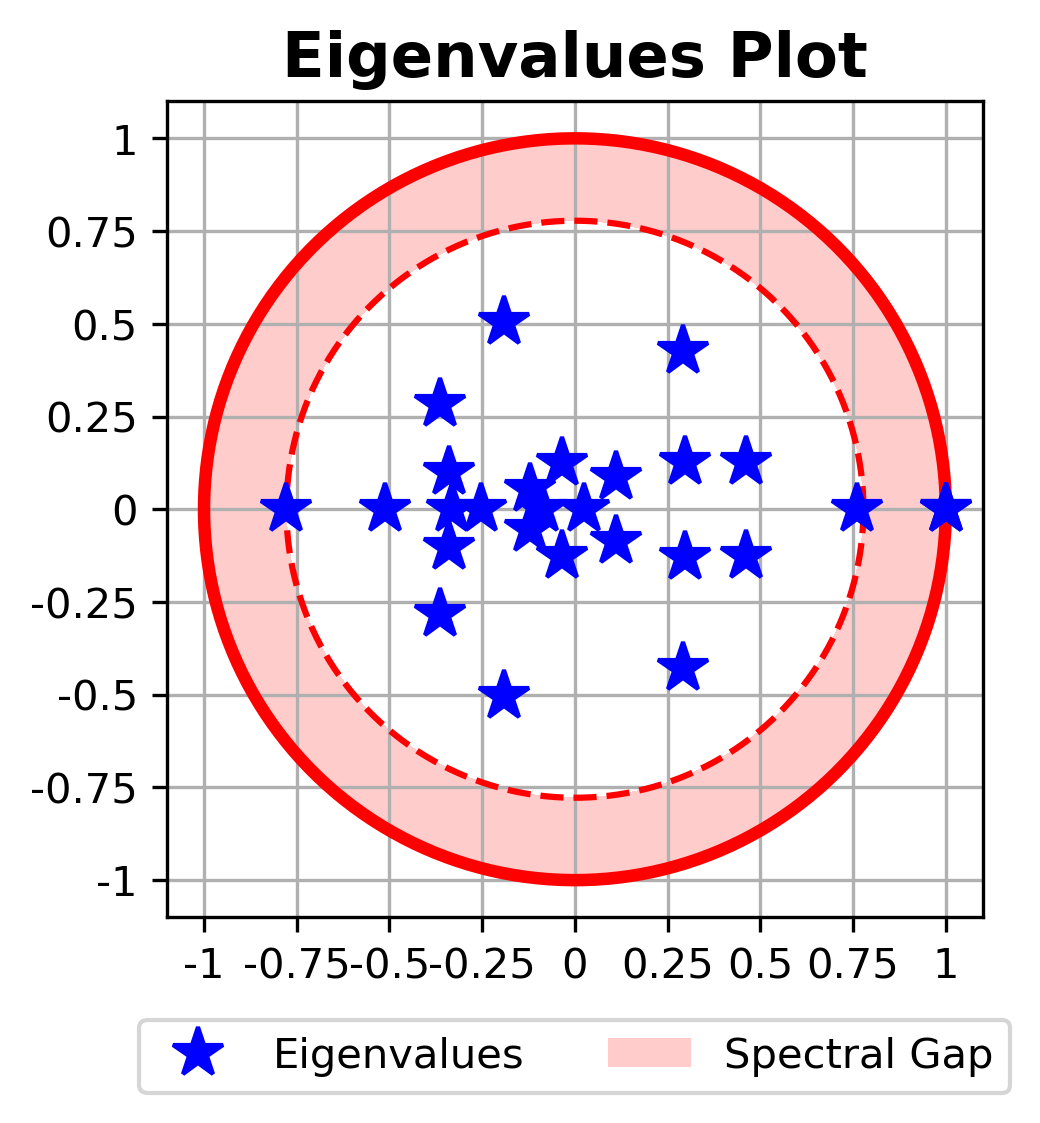

In [121]:
pydtmc.plot_eigenvalues(mc, dpi=300)

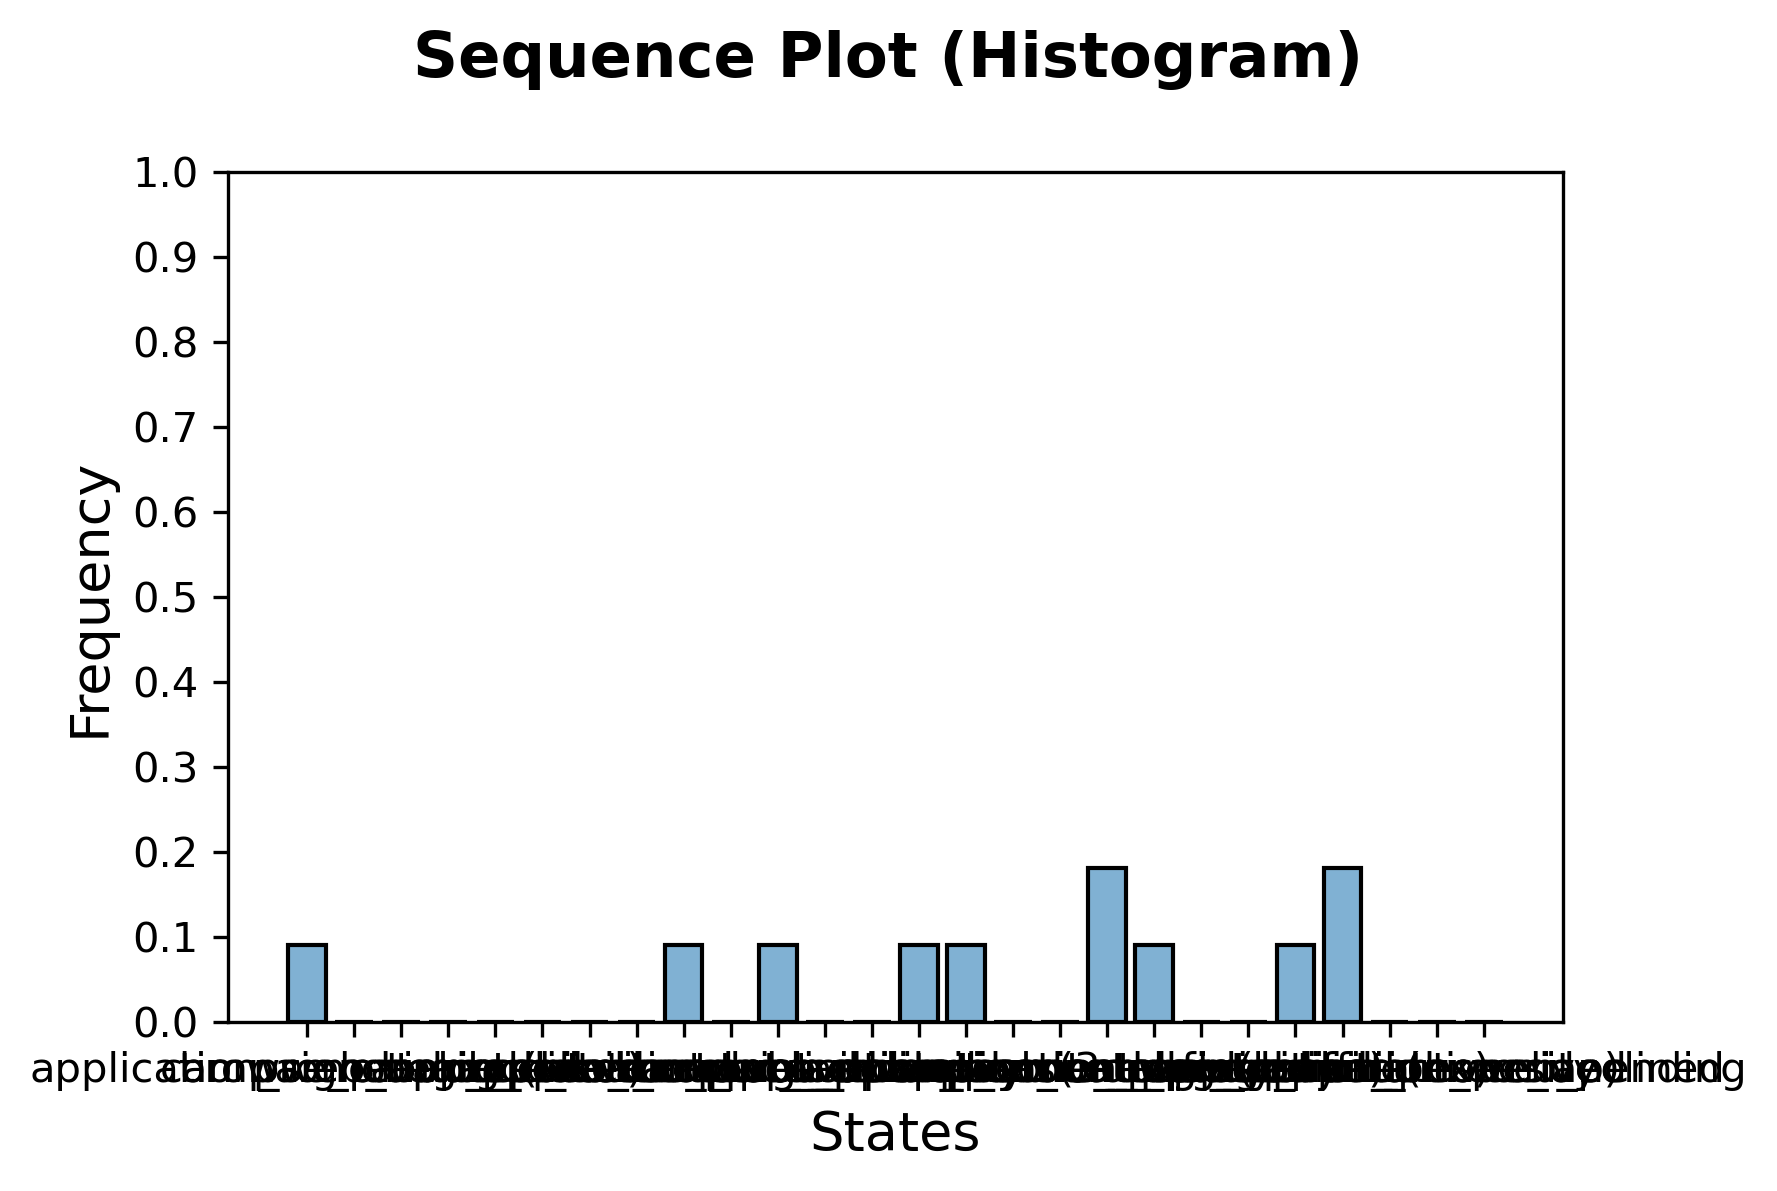

In [124]:
pydtmc.plot_sequence(mc, 10, plot_type='histogram', dpi=300)

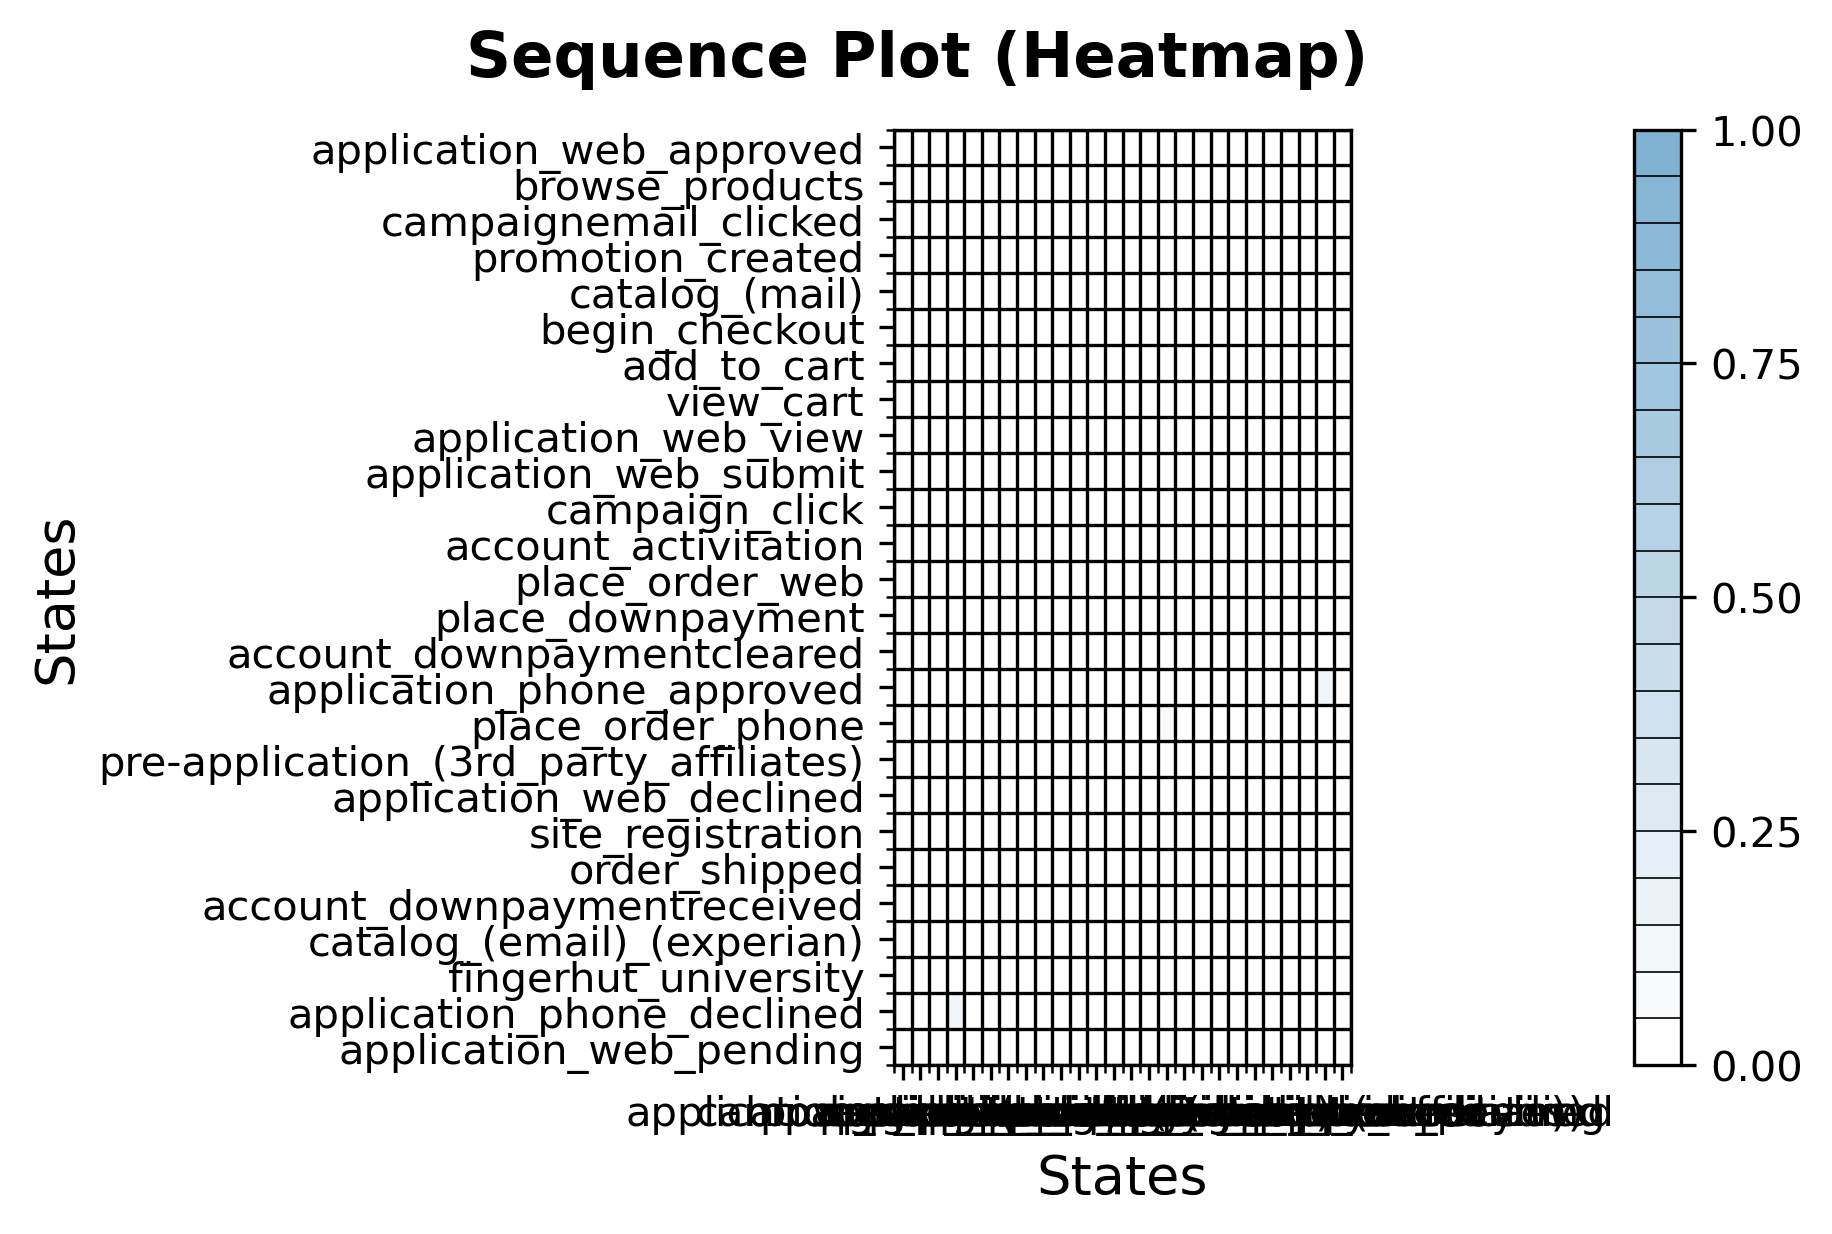

In [130]:
pydtmc.plot_sequence(mc, 26, plot_type='heatmap', dpi=300)

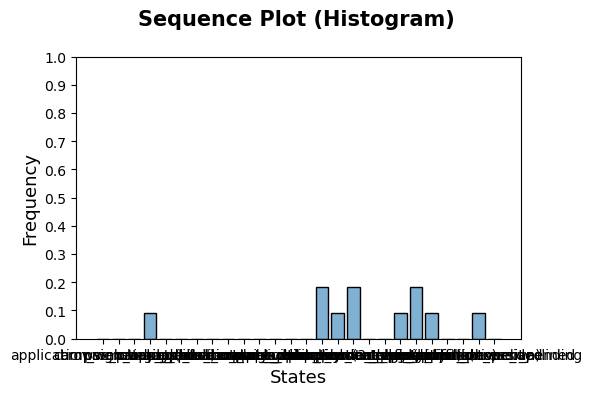

In [136]:
pydtmc.plot_sequence(mc, 10, initial_state=None, plot_type='histogram', seed=None, dpi=100)

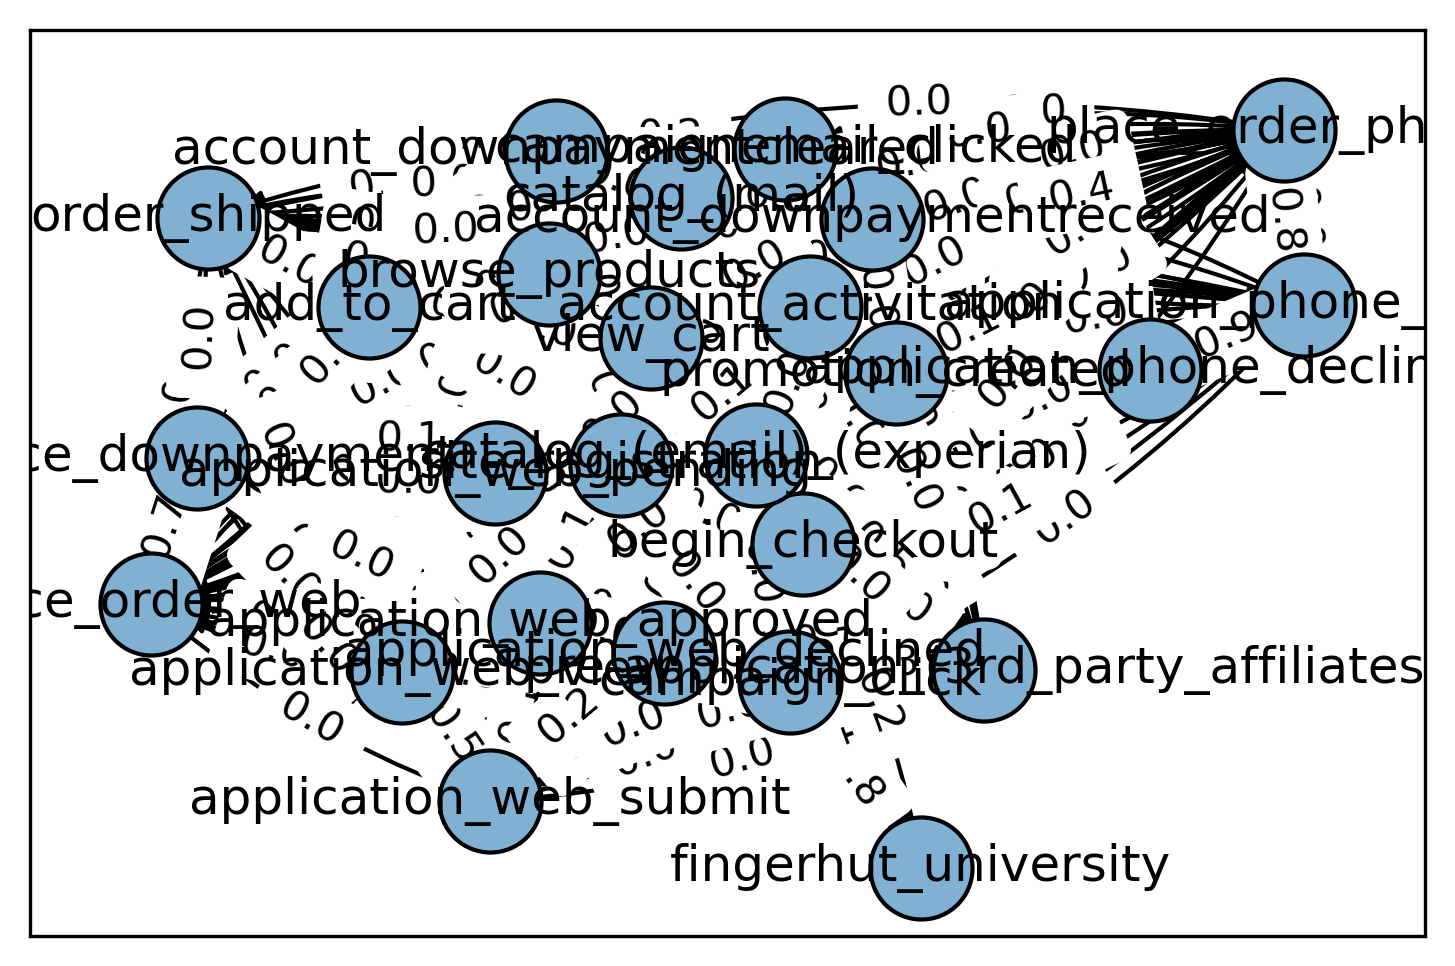

In [139]:
pydtmc.plot_graph(mc, nodes_color=True, nodes_shape=True, edges_label=True, force_standard=False, dpi=300)

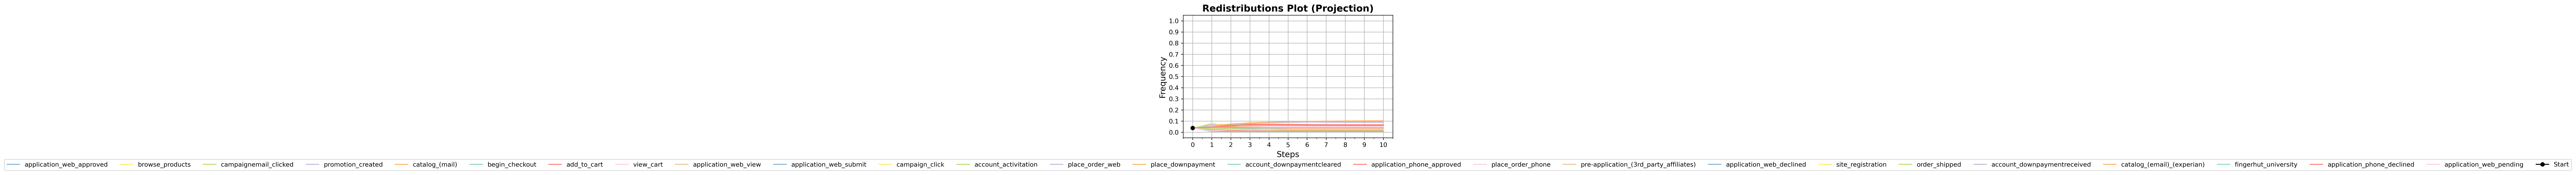

In [144]:
pydtmc.plot_redistributions(mc, 10, plot_type='projection', dpi=300)

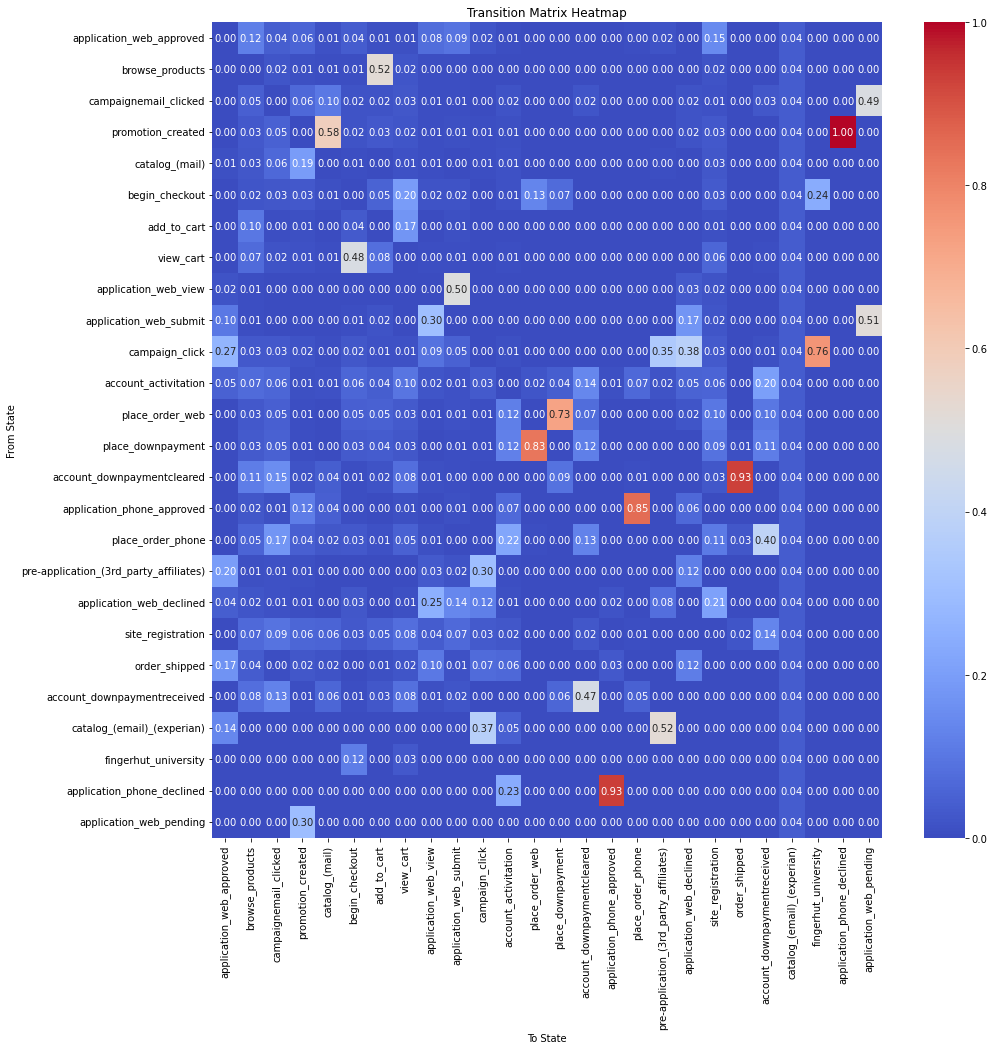

In [151]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(transition_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()